In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Print confirmation message
print("✅ All modules are loaded successfully!")


✅ All modules are loaded successfully!


In [3]:
df = pd.read_csv("/Users/sanjanadonthula/Documents/fitness app/dataset-2.csv")  # Raw string
print("✅ Dataset loaded successfully!")
print(df.head(205))  # Display first 205 rows


✅ Dataset loaded successfully!
     User_ID  Age  Gender  Height_cm  Weight_kg  Steps_Per_Day  \
0          1   56   Other        189         62          13394   
1          2   46  Female        165         89           5432   
2          3   32    Male        162         91          14568   
3          4   25  Female        199         58          15178   
4          5   38  Female        191         99          18660   
..       ...  ...     ...        ...        ...            ...   
195      196   23    Male        193         94           4228   
196      197   49  Female        166         76          15382   
197      198   21   Other        187         75          19755   
198      199   28   Other        156         96           3891   
199      200   34   Other        195        105           4756   

     Calories_Burned  Workout_Minutes  Heart_Rate  Sleep_Hours   BMI  \
0               1629               16          93          4.9  17.4   
1               1594            

In [4]:
print(df.isnull().sum())


User_ID                     0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Steps_Per_Day               0
Calories_Burned             0
Workout_Minutes             0
Heart_Rate                  0
Sleep_Hours                 0
BMI                         0
Fitness_Level               0
Activity_Type               0
Water_Intake_L              0
Daily_Caloric_Intake        0
Mood_Score                  0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Date                        0
dtype: int64


In [5]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df["Date"] = pd.to_datetime(df["Date"])  # Convert Date column to datetime
df.set_index("Date", inplace=True)  # Set Date as index
df.head()


,User_ID,Age,Gender,Height_cm,Weight_kg,Steps_Per_Day,Calories_Burned,Workout_Minutes,Heart_Rate,Sleep_Hours,BMI,Fitness_Level,Activity_Type,Water_Intake_L,Daily_Caloric_Intake,Mood_Score,Blood_Pressure_Systolic,Blood_Pressure_Diastolic
Date,,,,,,,,,,,,,,,,,,
2024-01-01,1,56,Other,189,62,13394,1629,16,93,4.9,17.4,Medium,Running,1.6,2781,7,104,83
2024-01-02,2,46,Female,165,89,5432,1594,25,65,7.9,32.7,Medium,Yoga,1.9,3349,7,107,61
2024-01-03,3,32,Male,162,91,14568,3455,84,93,8.7,34.7,High,Yoga,3.4,2254,6,121,81
2024-01-04,4,25,Female,199,58,15178,2293,91,96,4.8,14.6,High,Cycling,1.6,2397,6,100,62
2024-01-05,5,38,Female,191,99,18660,3334,61,59,7.9,27.1,High,Gym,3.8,3468,9,109,71


In [6]:
print(df.columns)  # Check available column names


Index(['User_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Steps_Per_Day',
       'Calories_Burned', 'Workout_Minutes', 'Heart_Rate', 'Sleep_Hours',
       'BMI', 'Fitness_Level', 'Activity_Type', 'Water_Intake_L',
       'Daily_Caloric_Intake', 'Mood_Score', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic'],
      dtype='object')


In [7]:
print(df.head())  # See if there are any date-related columns


            User_ID  Age  Gender  Height_cm  Weight_kg  Steps_Per_Day  \
Date                                                                    
2024-01-01        1   56   Other        189         62          13394   
2024-01-02        2   46  Female        165         89           5432   
2024-01-03        3   32    Male        162         91          14568   
2024-01-04        4   25  Female        199         58          15178   
2024-01-05        5   38  Female        191         99          18660   

            Calories_Burned  Workout_Minutes  Heart_Rate  Sleep_Hours   BMI  \
Date                                                                          
2024-01-01             1629               16          93          4.9  17.4   
2024-01-02             1594               25          65          7.9  32.7   
2024-01-03             3455               84          93          8.7  34.7   
2024-01-04             2293               91          96          4.8  14.6   
2024-01-05    

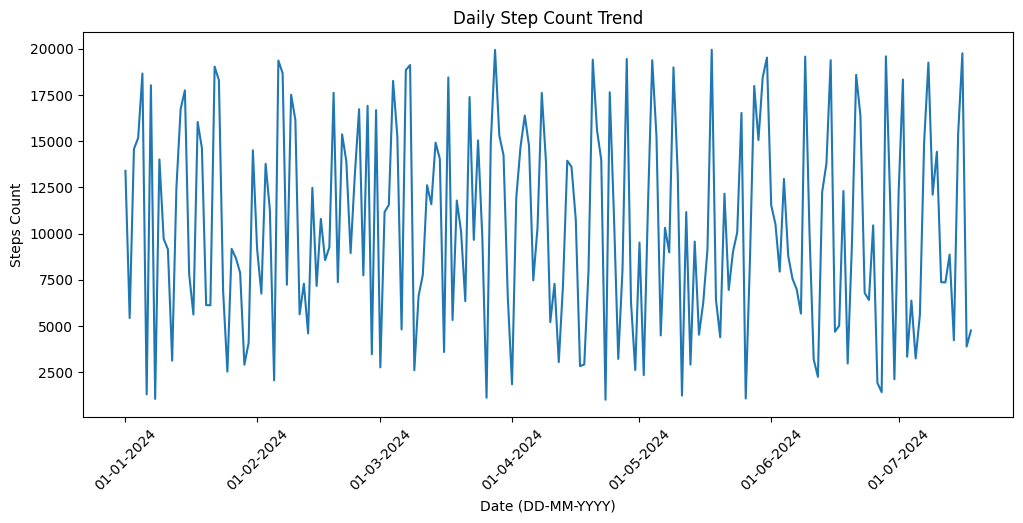

In [8]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df.index, y=df["Steps_Per_Day"])
plt.title("Daily Step Count Trend")
plt.xlabel("Date (DD-MM-YYYY)")
plt.ylabel("Steps Count")

# Format x-axis to show DD-MM-YYYY
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))  
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

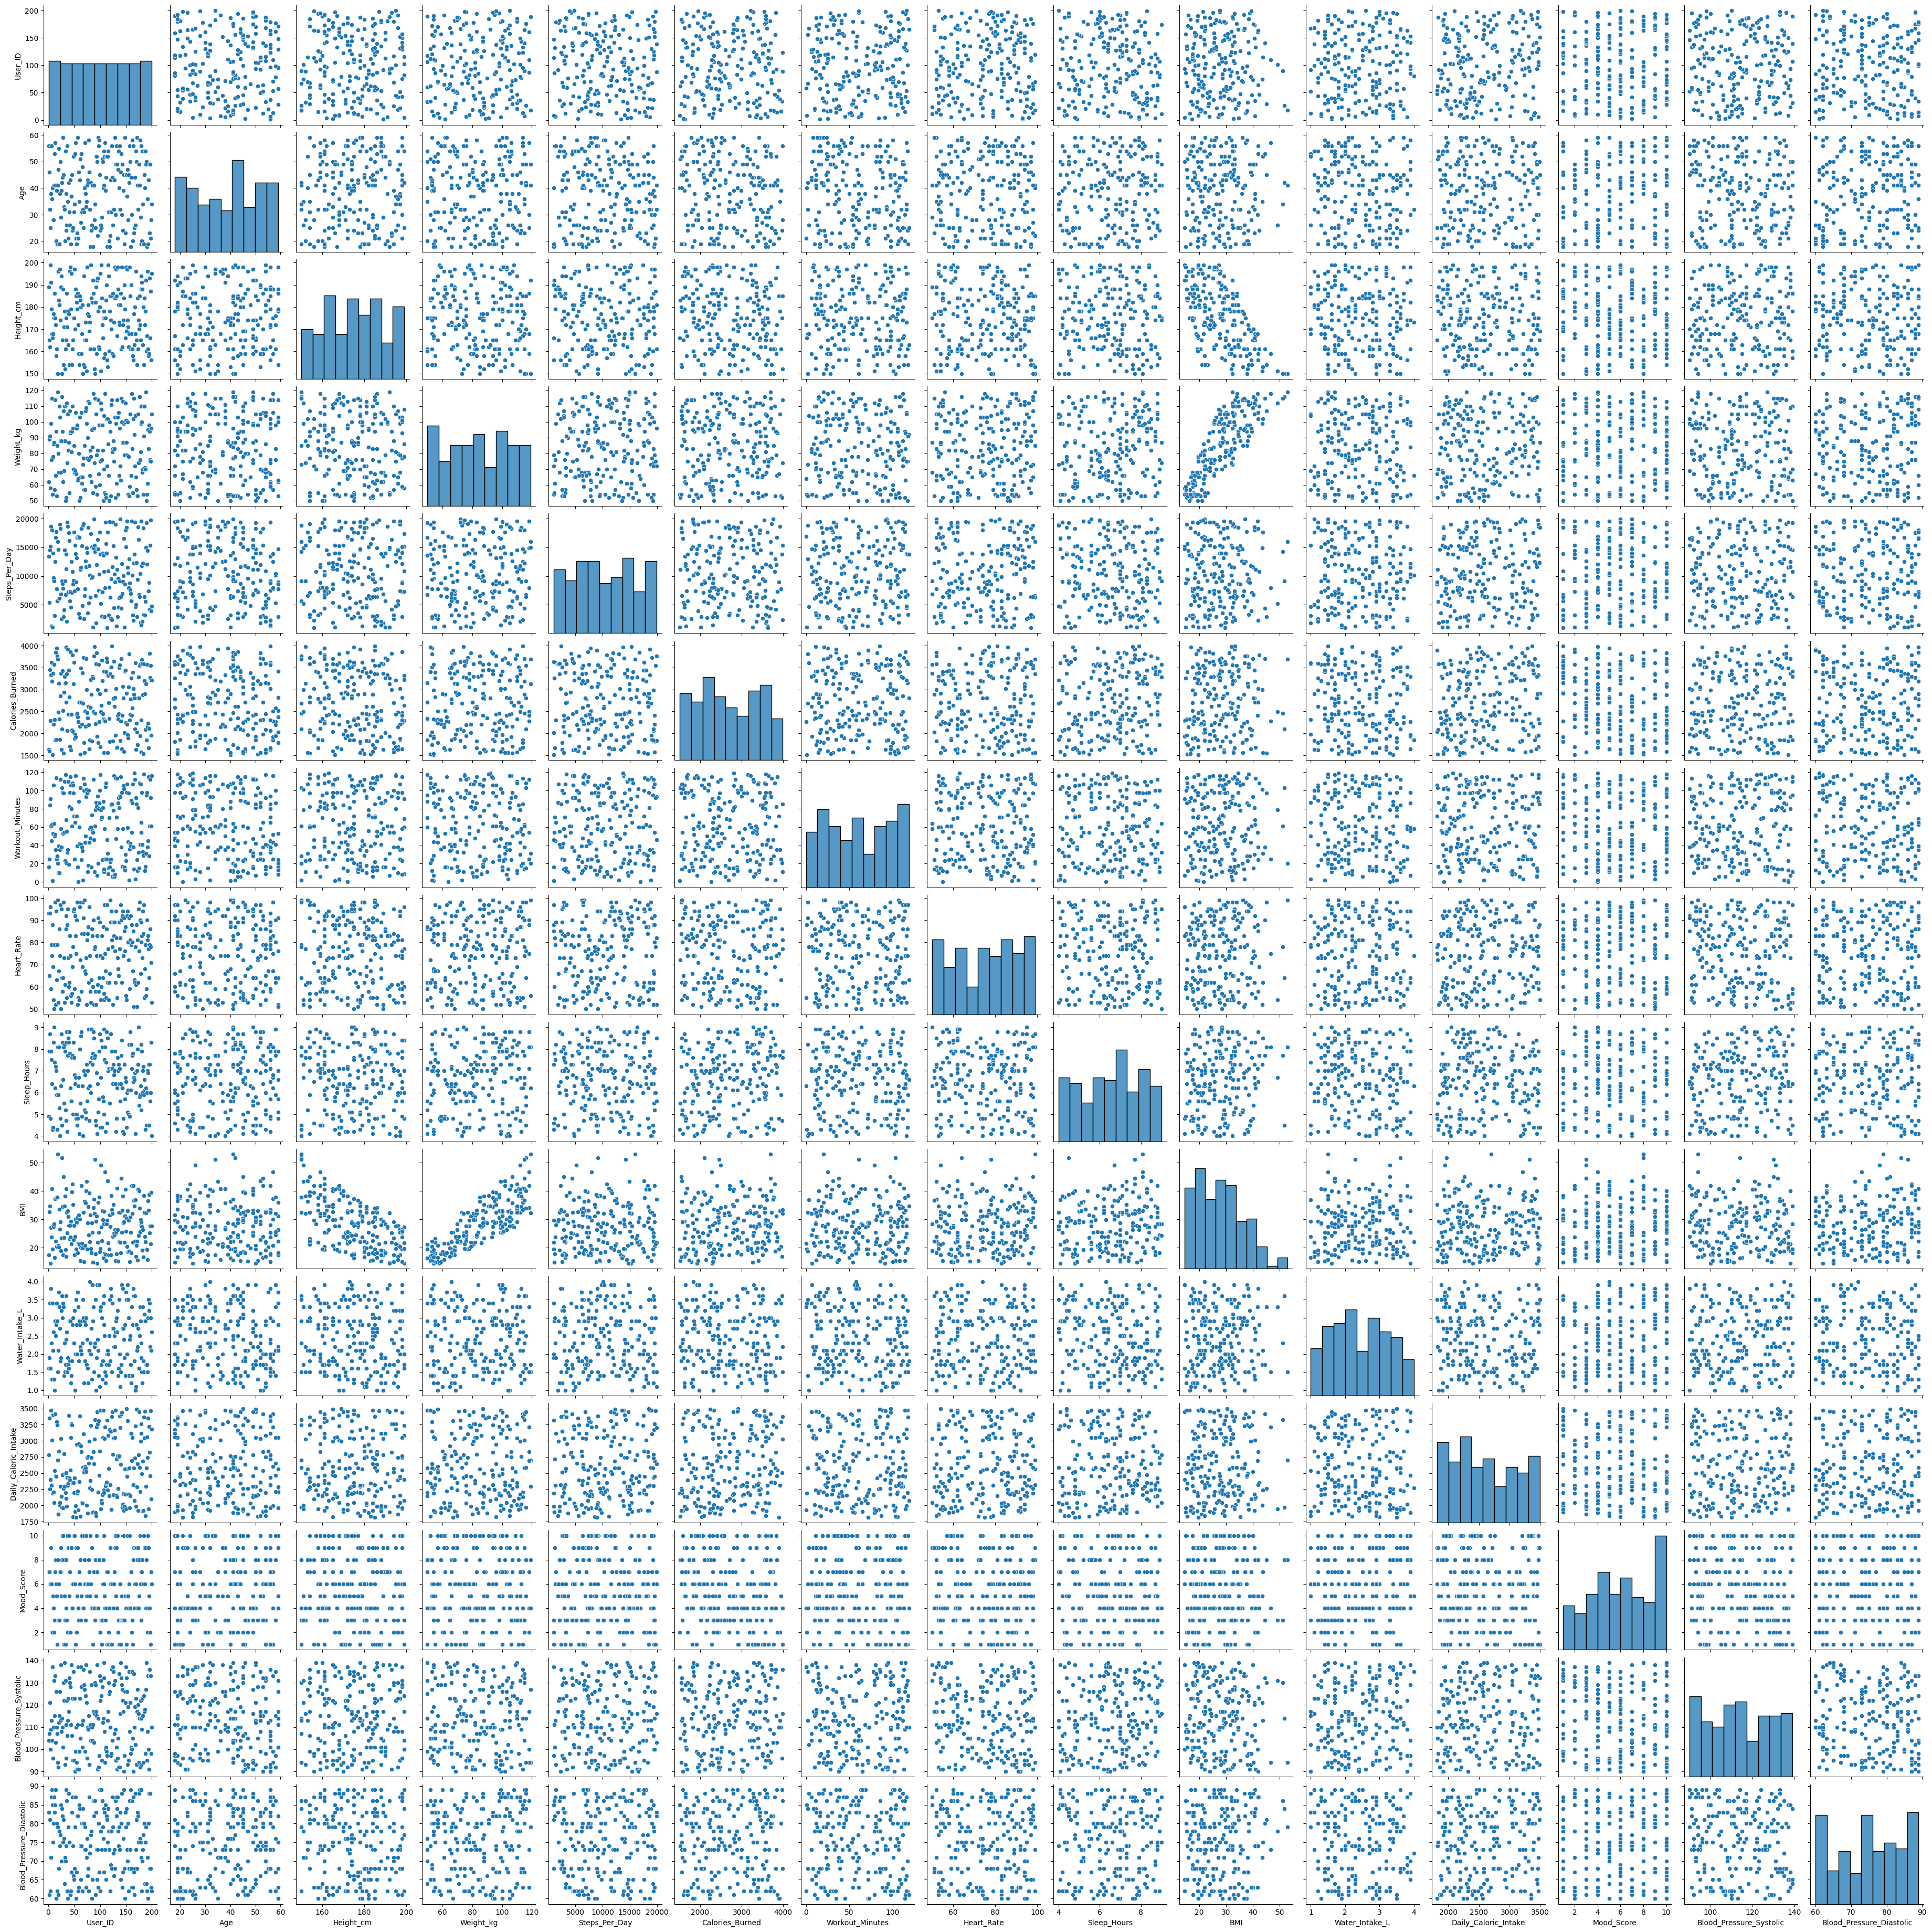

In [9]:
sns.pairplot(df)
plt.show()


In [10]:
X = df[["Steps_Per_Day", "Workout_Minutes", "Sleep_Hours"]]
y = df["Calories_Burned"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


MAE: 589.6215
MSE: 493416.983175


In [11]:
def recommend_workout(Steps_Per_Day, workout_minutes, sleep_hours):
    if Steps_Per_Day < 5000:
        return "Increase daily steps to 8,000+"
    elif workout_minutes < 30:
        return "Add at least 30 minutes of workout"
    elif sleep_hours < 6:
        return "Improve sleep to 7-9 hours"
    else:
        return "Keep up the great work!"

df["Workout_Recommendation"] = df.apply(lambda row: recommend_workout(row["Steps_Per_Day"], row["Workout_Minutes"], row["Sleep_Hours"]), axis=1)
df.head()


,User_ID,Age,Gender,Height_cm,Weight_kg,Steps_Per_Day,Calories_Burned,Workout_Minutes,Heart_Rate,Sleep_Hours,BMI,Fitness_Level,Activity_Type,Water_Intake_L,Daily_Caloric_Intake,Mood_Score,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Workout_Recommendation
Date,,,,,,,,,,,,,,,,,,,
2024-01-01,1,56,Other,189,62,13394,1629,16,93,4.9,17.4,Medium,Running,1.6,2781,7,104,83,Add at least 30 minutes of workout
2024-01-02,2,46,Female,165,89,5432,1594,25,65,7.9,32.7,Medium,Yoga,1.9,3349,7,107,61,Add at least 30 minutes of workout
2024-01-03,3,32,Male,162,91,14568,3455,84,93,8.7,34.7,High,Yoga,3.4,2254,6,121,81,Keep up the great work!
2024-01-04,4,25,Female,199,58,15178,2293,91,96,4.8,14.6,High,Cycling,1.6,2397,6,100,62,Improve sleep to 7-9 hours
2024-01-05,5,38,Female,191,99,18660,3334,61,59,7.9,27.1,High,Gym,3.8,3468,9,109,71,Keep up the great work!
